In [119]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [120]:
train = pd.read_csv("../Dados/train.csv")
test  = pd.read_csv("../Dados/test.csv")
gender_sub = pd.read_csv("../Dados/gender_submission.csv")  # PassengerId, Survived (previsão baseline)

In [121]:
train.shape

(891, 12)

In [122]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [123]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [124]:
train.groupby("Sex")["Survived"].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [125]:
train.groupby("Pclass")["Survived"].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [126]:
train.groupby(pd.cut(train["Age"], [0,6,12,18,35,60,100]))["Survived"].mean()

/tmp/ipykernel_6359/272222870.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train.groupby(pd.cut(train["Age"], [0,6,12,18,35,60,100]))["Survived"].mean()


Age
(0, 6]       0.702128
(6, 12]      0.318182
(12, 18]     0.428571
(18, 35]     0.382682
(35, 60]     0.400000
(60, 100]    0.227273
Name: Survived, dtype: float64

In [127]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [128]:
drop_cols = ["Name","Ticket","Cabin","PassengerId"]
df = train.drop(columns=drop_cols).copy()


In [129]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [130]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [132]:
df["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [133]:
df["Sex"].describe()

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

In [134]:
print(df.groupby(['Survived','Sex']).size())

print("----")

print(df.groupby('Sex')['Survived'].mean())

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
dtype: int64
----
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


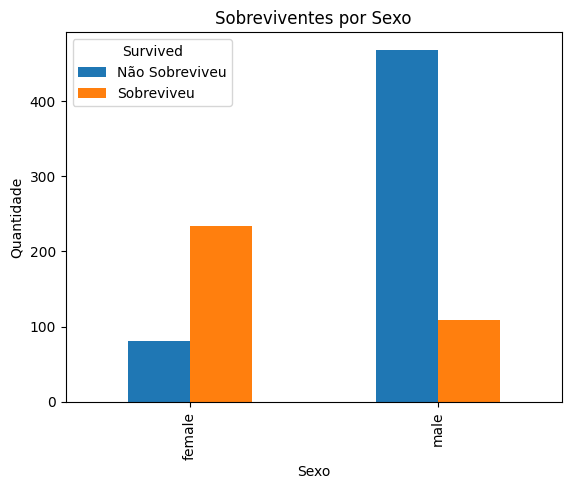

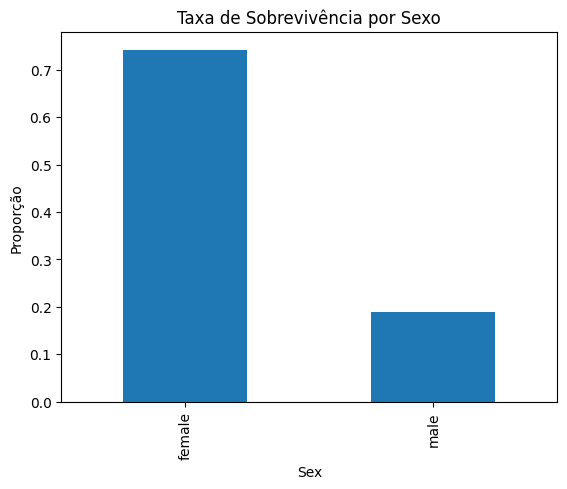

In [135]:
contagem = df.groupby(["Sex", "Survived"]).size().unstack()

contagem.plot(kind="bar", stacked=False)
plt.title("Sobreviventes por Sexo")
plt.xlabel("Sexo")
plt.ylabel("Quantidade")
plt.legend(title="Survived", labels=["Não Sobreviveu", "Sobreviveu"])
plt.show()

taxa = df.groupby("Sex")["Survived"].mean()

taxa.plot(kind="bar")
plt.title("Taxa de Sobrevivência por Sexo")
plt.ylabel("Proporção")
plt.show()

In [136]:
bins = [0, 12, 18, 35, 60, 100]  # definindo faixas
labels = ['Criança', 'Adolescente', 'Adulto Jovem', 'Adulto', 'Idoso']

df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)

print(df.groupby(['Survived','AgeGroup']).size())
print("----")
print(df.groupby('AgeGroup')['Survived'].mean())


Survived  AgeGroup    
0         Criança          29
          Adolescente      40
          Adulto Jovem    221
          Adulto          117
          Idoso            17
1         Criança          40
          Adolescente      30
          Adulto Jovem    137
          Adulto           78
          Idoso             5
dtype: int64
----
AgeGroup
Criança         0.579710
Adolescente     0.428571
Adulto Jovem    0.382682
Adulto          0.400000
Idoso           0.227273
Name: Survived, dtype: float64


/tmp/ipykernel_6359/115000710.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby(['Survived','AgeGroup']).size())
/tmp/ipykernel_6359/115000710.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('AgeGroup')['Survived'].mean())


/tmp/ipykernel_6359/474353304.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  taxa_idade = df.groupby("AgeGroup")["Survived"].mean()


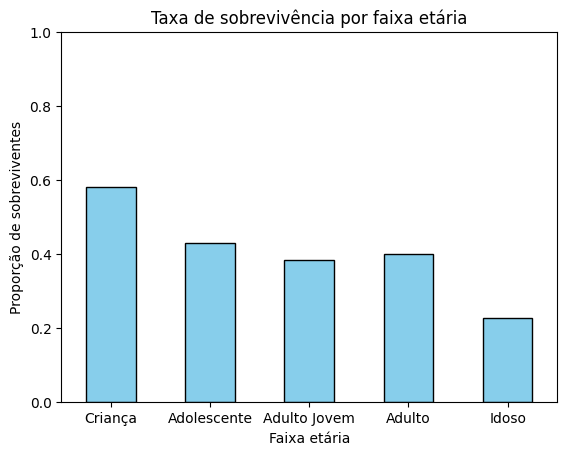

/tmp/ipykernel_6359/474353304.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contagem = df.groupby(["AgeGroup", "Survived"]).size().unstack()


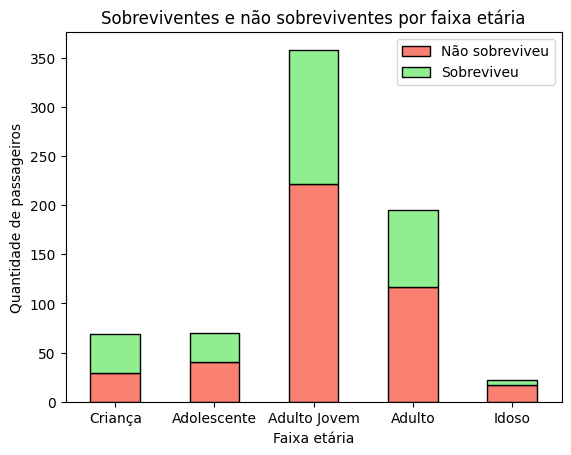

In [137]:
# calcular taxa de sobrevivência por faixa
taxa_idade = df.groupby("AgeGroup")["Survived"].mean()

# plotar
taxa_idade.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Taxa de sobrevivência por faixa etária")
plt.ylabel("Proporção de sobreviventes")
plt.xlabel("Faixa etária")
plt.xticks(rotation=0)
plt.ylim(0,1)  # para ficar entre 0 e 100%
plt.show()

contagem = df.groupby(["AgeGroup", "Survived"]).size().unstack()

contagem.plot(kind="bar", stacked=True, color=["salmon", "lightgreen"], edgecolor="black")
plt.title("Sobreviventes e não sobreviventes por faixa etária")
plt.xlabel("Faixa etária")
plt.ylabel("Quantidade de passageiros")
plt.xticks(rotation=0)
plt.legend(["Não sobreviveu", "Sobreviveu"])
plt.show()


/tmp/ipykernel_6359/1853209189.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  taxa = df.groupby(['AgeGroup','Sex'])['Survived'].mean().unstack()


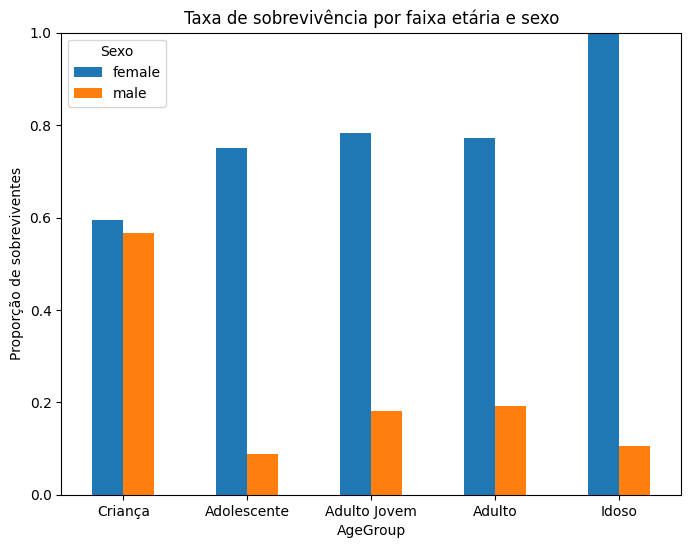

In [138]:
taxa = df.groupby(['AgeGroup','Sex'])['Survived'].mean().unstack()

taxa.plot(kind="bar", figsize=(8,6))
plt.title("Taxa de sobrevivência por faixa etária e sexo")
plt.ylabel("Proporção de sobreviventes")
plt.xticks(rotation=0)
plt.ylim(0,1)
plt.legend(title="Sexo")
plt.show()

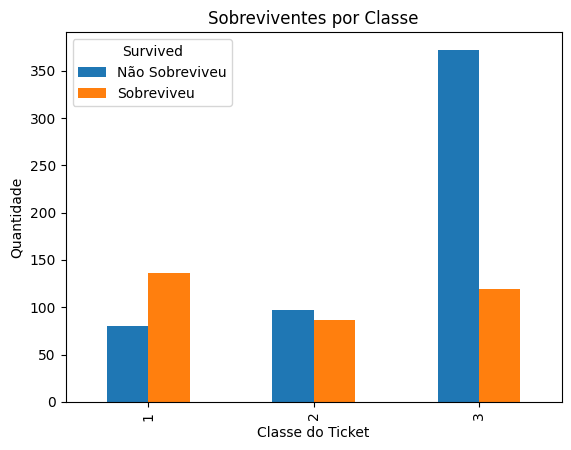

In [139]:
contagem = df.groupby(["Pclass", "Survived"]).size().unstack()

contagem.plot(kind="bar", stacked=False)
plt.title("Sobreviventes por Classe")
plt.xlabel("Classe do Ticket")
plt.ylabel("Quantidade")
plt.legend(title="Survived", labels=["Não Sobreviveu", "Sobreviveu"])
plt.show()


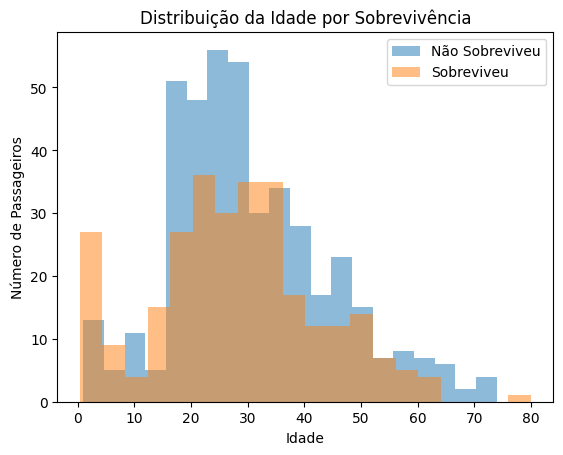

In [140]:
plt.hist(df[df["Survived"]==0]["Age"].dropna(), bins=20, alpha=0.5, label="Não Sobreviveu")
plt.hist(df[df["Survived"]==1]["Age"].dropna(), bins=20, alpha=0.5, label="Sobreviveu")
plt.title("Distribuição da Idade por Sobrevivência")
plt.xlabel("Idade")
plt.ylabel("Número de Passageiros")
plt.legend()
plt.show()


In [141]:
print(df.groupby(['Survived','Pclass']).size())
print("----")
print(df.groupby('Pclass')['Survived'].mean())


Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
dtype: int64
----
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [142]:
print(df.groupby(['Survived','Embarked']).size())
print("----")
print(df.groupby('Embarked')['Survived'].mean())

Survived  Embarked
0         C            75
          Q            47
          S           427
1         C            93
          Q            30
          S           217
dtype: int64
----
Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


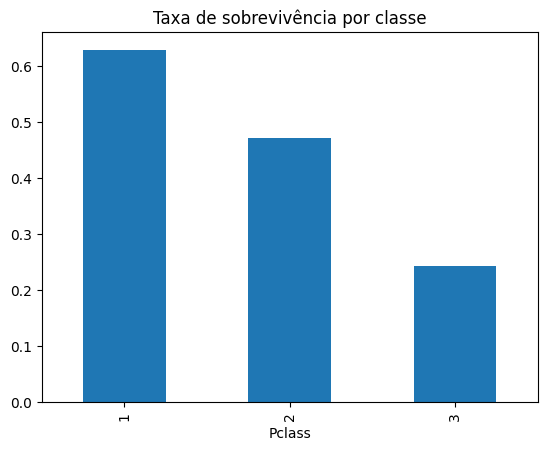

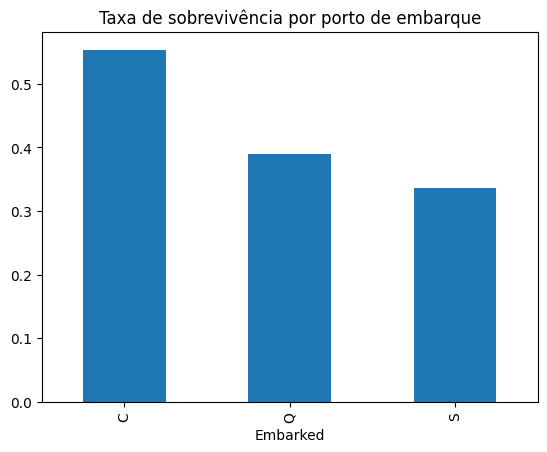

In [143]:

df.groupby('Pclass')['Survived'].mean().plot(kind='bar', title='Taxa de sobrevivência por classe')
plt.show()

df.groupby('Embarked')['Survived'].mean().plot(kind='bar', title='Taxa de sobrevivência por porto de embarque')
plt.show()

In [144]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup
0,0,3,male,22.0,1,0,7.2500,S,Adulto Jovem
1,1,1,female,38.0,1,0,71.2833,C,Adulto
2,1,3,female,26.0,0,0,7.9250,S,Adulto Jovem
3,1,1,female,35.0,1,0,53.1000,S,Adulto Jovem
4,0,3,male,35.0,0,0,8.0500,S,Adulto Jovem


In [145]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
AgeGroup    177
dtype: int64

In [146]:
df_encoded = df.copy()
df_encoded= df_encoded.drop(columns="AgeGroup")
df_encoded.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [147]:
df_encoded['Age'] = df_encoded['Age'].fillna(df_encoded['Age'].median())
df_encoded['Fare'] = df_encoded['Fare'].fillna(df_encoded['Fare'].median())

In [148]:
df_encoded['Sex'] = df_encoded['Sex'].map({'male': 0, 'female': 1})

df_encoded['Embarked'] = df_encoded['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [149]:
df_encoded['Embarked'] = df_encoded['Embarked'].fillna(0)

In [150]:
X = df_encoded.drop(columns=["Survived"])
y = df_encoded["Survived"]

In [151]:
from sklearn.tree import DecisionTreeClassifier, export_text

clf = DecisionTreeClassifier(max_depth=None, random_state=42)

clf.fit(X, y)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [152]:
rules = export_text(clf, feature_names=list(X.columns))
print(rules)

|--- Sex <= 0.50
|   |--- Age <= 6.50
|   |   |--- SibSp <= 2.50
|   |   |   |--- class: 1
|   |   |--- SibSp >  2.50
|   |   |   |--- Age <= 2.50
|   |   |   |   |--- class: 0
|   |   |   |--- Age >  2.50
|   |   |   |   |--- Fare <= 31.33
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Fare >  31.33
|   |   |   |   |   |--- class: 1
|   |--- Age >  6.50
|   |   |--- Pclass <= 1.50
|   |   |   |--- Fare <= 26.14
|   |   |   |   |--- class: 0
|   |   |   |--- Fare >  26.14
|   |   |   |   |--- Age <= 53.00
|   |   |   |   |   |--- Fare <= 27.14
|   |   |   |   |   |   |--- Fare <= 26.47
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Fare >  26.47
|   |   |   |   |   |   |   |--- Age <= 46.50
|   |   |   |   |   |   |   |   |--- Age <= 40.00
|   |   |   |   |   |   |   |   |   |--- Age <= 31.00
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- Age >  31.00
|   |   |   |   |   |   |   |   |   |   |--- class: 1
| 

In [153]:
test_encoded = test.copy()

test_encoded["Sex"] = test_encoded["Sex"].map({"male": 0, "female": 1})
test_encoded["Embarked"] = test_encoded["Embarked"].map({"S": 0, "C": 1, "Q": 2})


test_encoded["Age"] = test_encoded["Age"].fillna(df_encoded["Age"].median())
test_encoded["Fare"] = test_encoded["Fare"].fillna(df_encoded["Fare"].median())
test_encoded["Embarked"] = test_encoded["Embarked"].fillna(0)


X_test = test_encoded.drop(columns=["Name","Ticket","Cabin","PassengerId"])

In [154]:
y_pred = clf.predict(X_test)

In [155]:
submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": y_pred.astype(int)
})

submission.to_csv("submission.csv", index=False)
print("Arquivo salvo: submission.csv")


Arquivo salvo: submission.csv


In [156]:
X = df_encoded.drop(columns=["Survived"])
y = df_encoded["Survived"].astype(int)

In [157]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_tr, X_val, y_tr, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

clf = DecisionTreeClassifier(max_depth=None, random_state=42)
clf.fit(X_tr, y_tr)

y_pred = clf.predict(X_val)

acc = accuracy_score(y_val, y_pred)
print("Acurácia (validação):", acc)


Acurácia (validação): 0.8212290502793296
